# Reflect stats

In [2]:
from datetime import datetime
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

from reflect.stats import SOLVE_DURATION_DIFFICULTY_BINS, load_firebase_events, compute_per_device_stats, compute_stats, load_features, merge_stats_and_features

## Playing stats

In [3]:
events_df = load_firebase_events()
device_df = compute_per_device_stats(events_df)
stats_df = compute_stats(events_df, device_df)
stats_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19
5,2023-04-20,11,11,11,100.000000,0.000000,107.4710,medium,2023-04-20
6,2023-04-21,12,12,11,91.666667,8.333333,370.8970,hard,2023-04-21
7,2023-04-22,17,16,12,75.000000,25.000000,90.7595,easy,2023-04-22
8,2023-04-23,17,17,15,88.235294,11.764706,264.7810,hard,2023-04-23
9,2023-04-24,25,24,22,91.666667,8.333333,117.3940,medium,2023-04-24


Total number of players ever (using devices as a proxy - of course the same person may have played on multiple devices)

In [4]:
len(events_df[events_df["name"] == "firstMove"]["device"].unique())

133

## Features

In [5]:
features_df = load_features()
all_df = merge_stats_and_features(stats_df, features_df)
all_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date,filename,...,num_double_reflect_blocks,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,num_zero_reflection_blocks,excess_reflections,num_excess_reflection_beams,difficulty,setter_solve_duration_s
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15,puzzle-2023-04-15.txt,...,2,4.666667,10,28,6,0,2,1,4,NaN
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16,puzzle-2023-04-16.txt,...,4,4.833333,9,29,4,0,2,1,4,NaN
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17,puzzle-2023-04-17.txt,...,4,6.000000,8,30,4,0,6,2,4,NaN
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18,puzzle-2023-04-18.txt,...,2,4.000000,7,28,0,0,1,1,4,NaN
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19,puzzle-2023-04-19.txt,...,2,4.666667,8,28,0,0,1,1,4,NaN
5,2023-04-20,11,11,11,100.000000,0.000000,107.4710,medium,2023-04-20,puzzle-2023-04-20.txt,...,2,6.500000,12,26,8,0,2,1,4,247.9
6,2023-04-21,12,12,11,91.666667,8.333333,370.8970,hard,2023-04-21,puzzle-2023-04-21.txt,...,3,4.500000,7,27,4,0,2,1,3,63.1
7,2023-04-22,17,16,12,75.000000,25.000000,90.7595,easy,2023-04-22,puzzle-2023-04-22.txt,...,4,5.666667,11,34,6,0,2,1,4,160.3
8,2023-04-23,17,17,15,88.235294,11.764706,264.7810,hard,2023-04-23,puzzle-2023-04-23.txt,...,2,3.857143,7,27,0,0,1,1,4,273.5
9,2023-04-24,25,24,22,91.666667,8.333333,117.3940,medium,2023-04-24,puzzle-2023-04-24.txt,...,1,4.200000,8,21,0,0,2,1,4,94.6


## Graphs

First let's look at median solve durations (compare to the setter duration indicated by +).

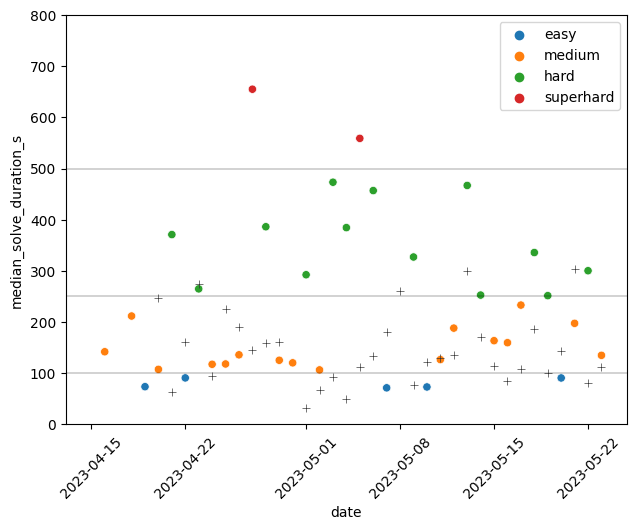

In [6]:
plt.ylim(0, 800)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');

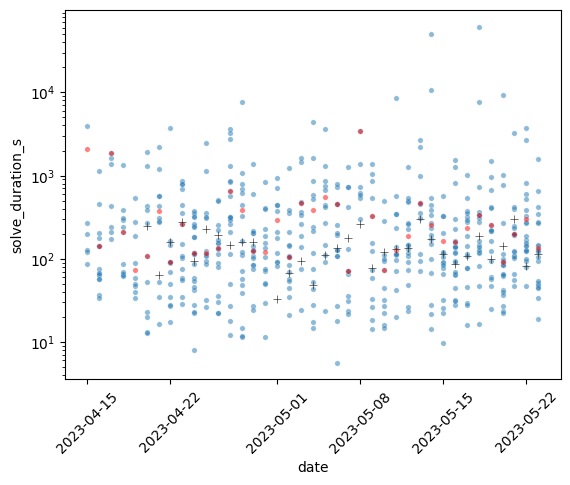

In [7]:
plt.xticks(rotation=45)
g = sns.scatterplot(data=device_df, x="date", y="solve_duration_s", s=15, alpha=0.5)
sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", s=15, alpha=0.5, color="red")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.set(yscale='log');

<Axes: xlabel='date', ylabel='failure_rate'>

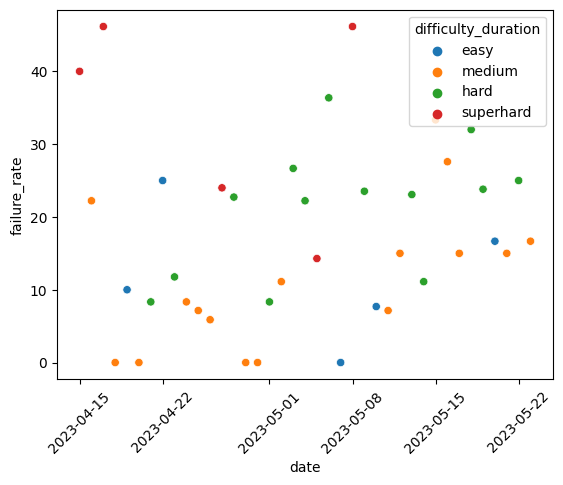

In [8]:
plt.xticks(rotation=45)
sns.scatterplot(data=stats_df, x="date", y="failure_rate", hue="difficulty_duration")

## Feature analysis

Let's see how features correlate with difficulty (as measured by `mean_solve_duration`)

In [9]:
all_df.columns

Index(['puzzle', 'n_players', 'n_started', 'n_solved', 'success_rate',
       'failure_rate', 'median_solve_duration_s', 'difficulty_duration',
       'date', 'filename', 'num_blocks', 'num_mirror_balls', 'num_beams',
       'num_reflections', 'mean_blocks_per_beam', 'max_blocks_per_beam',
       'num_multi_block_beams', 'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance',
       'num_zero_reflection_blocks', 'excess_reflections',
       'num_excess_reflection_beams', 'difficulty', 'setter_solve_duration_s'],
      dtype='object')

In [10]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams', 'num_reflections',
       'mean_blocks_per_beam', 'max_blocks_per_beam', 'num_multi_block_beams',
       'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance', 'excess_reflections',
       'num_excess_reflection_beams']

In [11]:
all_df[["median_solve_duration_s", "failure_rate"] + feature_names].corr(numeric_only=True)\
    .sort_values("median_solve_duration_s", ascending=False)

,median_solve_duration_s,failure_rate,num_blocks,num_mirror_balls,num_beams,num_reflections,mean_blocks_per_beam,max_blocks_per_beam,num_multi_block_beams,mean_beams_per_block,max_beams_per_block,num_double_reflect_blocks,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,excess_reflections,num_excess_reflection_beams
median_solve_duration_s,1.000000,0.668909,0.116134,0.038752,0.035203,0.019274,-0.146328,0.241941,-0.299706,-0.197380,-0.267863,0.151908,0.009833,-0.016835,0.098825,0.127037,0.216598,0.090447
failure_rate,0.668909,1.000000,0.186641,0.042859,0.112354,0.154305,-0.089038,0.304158,-0.301838,-0.103291,-0.290720,0.233446,-0.011625,0.141526,0.208717,0.246428,0.312846,0.146128
max_blocks_per_beam,0.241941,0.304158,0.337432,-0.330180,-0.057183,0.646294,0.388419,1.000000,-0.349681,-0.008623,-0.199864,0.568029,0.253601,0.491320,0.342839,0.362707,0.679715,0.321307
excess_reflections,0.216598,0.312846,0.327904,-0.486754,-0.305591,0.625125,0.589755,0.679715,-0.408363,-0.272038,-0.381776,0.445990,0.442390,0.375715,0.147323,0.300616,1.000000,0.805571
num_double_reflect_blocks,0.151908,0.233446,0.352749,-0.134214,0.197089,0.854829,0.290044,0.568029,0.117570,0.362984,-0.300138,1.000000,0.052122,0.357514,0.566877,0.388637,0.445990,0.239176
excess_beam_distance,0.127037,0.246428,-0.212862,-0.471269,-0.329989,0.314788,0.132233,0.362707,-0.373536,-0.220203,-0.571719,0.388637,0.504617,0.746077,0.153660,1.000000,0.300616,0.117511
num_blocks,0.116134,0.186641,1.000000,0.222558,0.504078,0.611679,0.226145,0.337432,0.405795,0.136058,0.195739,0.352749,-0.240064,-0.060836,0.545120,-0.212862,0.327904,0.130290
total_beam_distance,0.098825,0.208717,0.545120,0.207710,0.607304,0.533605,-0.265301,0.342839,0.178001,0.339103,-0.027687,0.566877,-0.111851,0.373691,1.000000,0.153660,0.147323,-0.029417
num_excess_reflection_beams,0.090447,0.146128,0.130290,-0.422006,-0.349442,0.378883,0.514672,0.321307,-0.295632,-0.220926,-0.208029,0.239176,0.359275,0.157401,-0.029417,0.117511,0.805571,1.000000
num_mirror_balls,0.038752,0.042859,0.222558,1.000000,0.835207,-0.375338,-0.577784,-0.330180,0.472827,0.689250,0.638269,-0.134214,-0.883783,-0.399822,0.207710,-0.471269,-0.486754,-0.422006


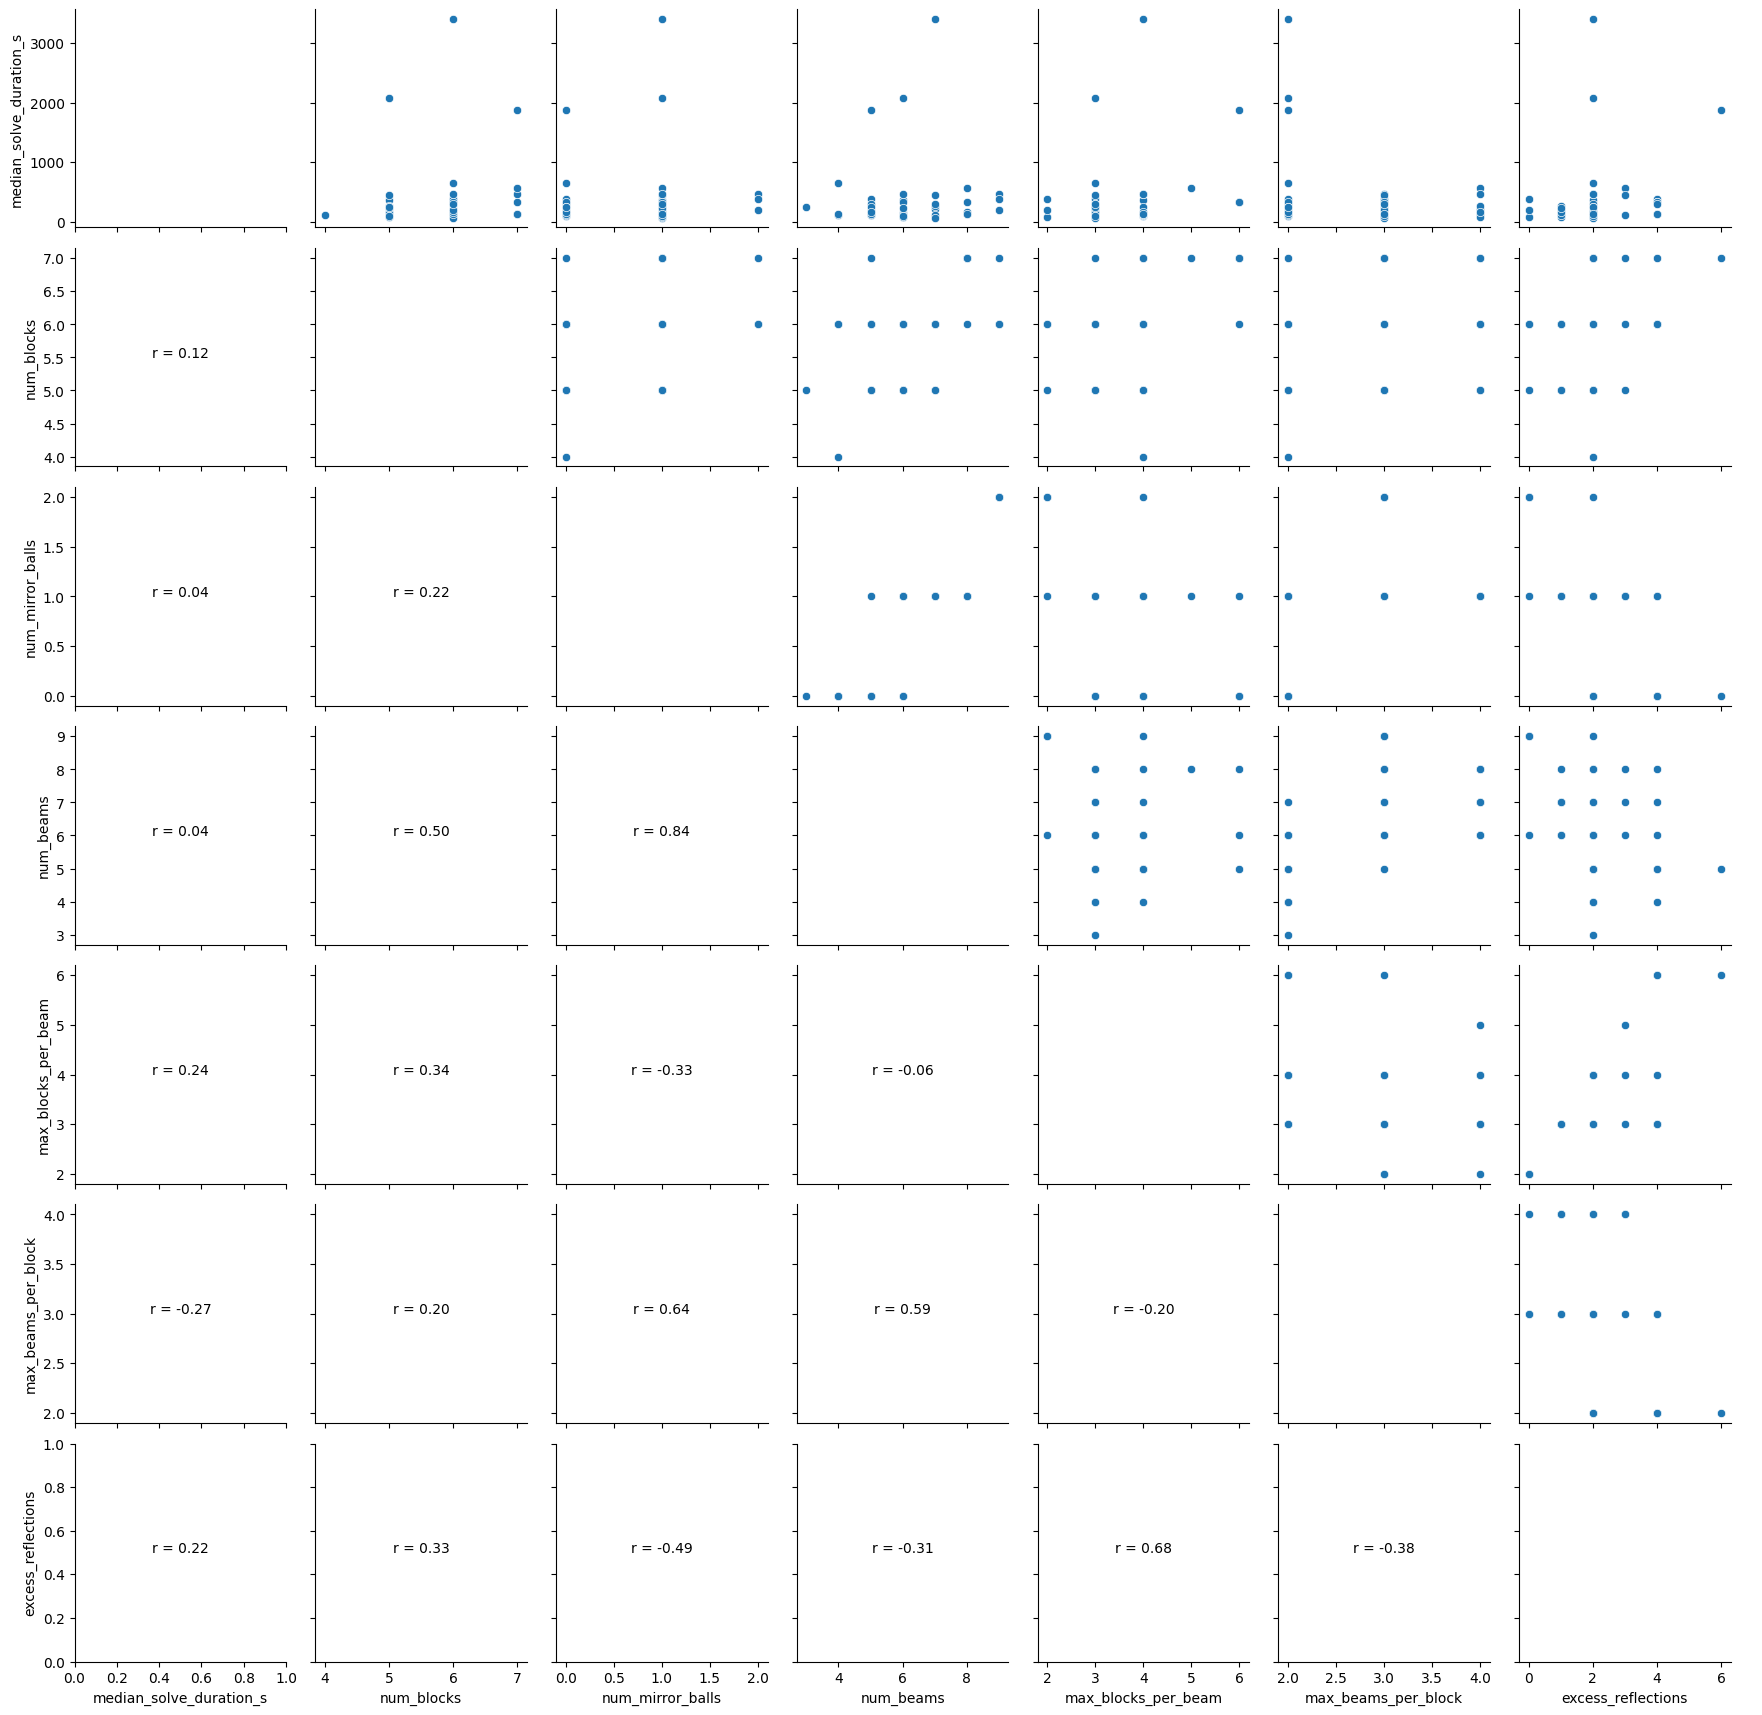

In [12]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
corr_df = all_df[["median_solve_duration_s", "num_blocks", "num_mirror_balls", "num_beams", "max_blocks_per_beam", "max_beams_per_block", "excess_reflections"]]

def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')

g = sns.PairGrid(corr_df)
g.map_upper(sns.scatterplot)
g.map_lower(reg_coef)
g.add_legend()

## Predictions over time

Train a model on data up to, but not including, date D, then use it to predict the solve duration on date D.

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
np.random.seed(42)

In [20]:
model_df = all_df[all_df["median_solve_duration_s"] < 1000] # remove outliers for model

In [21]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams',
        'num_reflections',
        'max_blocks_per_beam',
       'num_double_reflect_blocks', 'excess_reflections']

In [22]:
response_variable = "median_solve_duration_s"

In [24]:
predict_df = model_df.copy()
predict_df["predicted_solve_duration_s"] = np.nan

puzzles = model_df[model_df["puzzle"] >= "2023-05-01"]["puzzle"].tolist()

for puzzle in puzzles:
    train_df = model_df[model_df["puzzle"] < puzzle]
    X_train = train_df[feature_names]
    y_train = train_df[[response_variable]].values.ravel()

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    predicted_solve_duration_s = model.predict(model_df[model_df["puzzle"] == puzzle][feature_names])[0]

    predict_df.loc[predict_df['puzzle']==puzzle, ['predicted_solve_duration_s']] = predicted_solve_duration_s

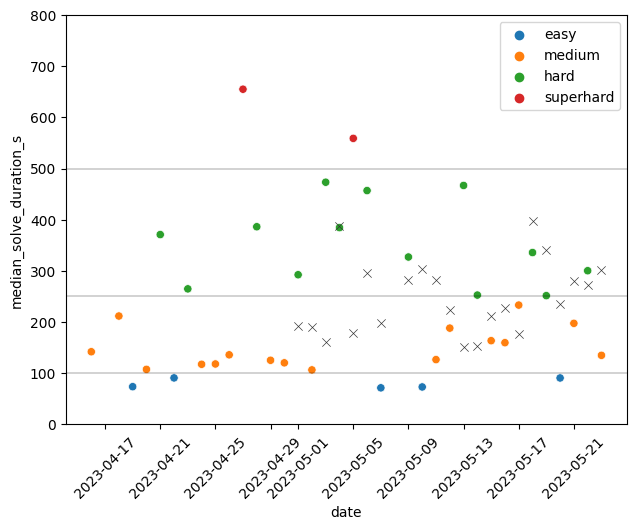

In [25]:
plt.ylim(0, 800)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=predict_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
# sns.scatterplot(data=predict_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
sns.scatterplot(data=predict_df, x="date", y="predicted_solve_duration_s", color=".2", marker="x")

g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');

# Baseline model

Let's produce a really simple linear model to predict solve duration (or failure rate). This is meant to be a baseline, and will hopefully help in setting puzzles of appropriate difficultly.

In [14]:
response_variable = "median_solve_duration_s"
#response_variable = "failure"

In [35]:
from sklearn.model_selection import train_test_split
model_df = all_df[all_df["median_solve_duration_s"] < 1000] # remove outliers for model
df_train, df_test = model_df[:-7], model_df[-7:]
df_test

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date,filename,...,num_double_reflect_blocks,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,num_zero_reflection_blocks,excess_reflections,num_excess_reflection_beams,difficulty,setter_solve_duration_s
32,2023-05-17,23,20,17,85.000000,15.000000,233.1035,medium,2023-05-17,puzzle-2023-05-17.txt,...,3,4.333333,6,26,0,0,1,1,3,108.9
33,2023-05-18,25,25,17,68.000000,32.000000,335.7600,hard,2023-05-18,puzzle-2023-05-18.txt,...,5,4.125000,12,33,8,0,4,1,4,186.7
34,2023-05-19,22,21,16,76.190476,23.809524,251.5200,hard,2023-05-19,puzzle-2023-05-19.txt,...,1,6.333333,7,19,2,0,2,1,4,100.1
35,2023-05-20,26,24,20,83.333333,16.666667,90.6540,easy,2023-05-20,puzzle-2023-05-20.txt,...,2,4.333333,8,26,4,0,2,1,4,144.1
36,2023-05-21,20,20,17,85.000000,15.000000,197.4125,medium,2023-05-21,puzzle-2023-05-21.txt,...,4,3.555556,8,32,4,0,0,0,4,302.8
37,2023-05-22,30,28,21,75.000000,25.000000,300.2405,hard,2023-05-22,puzzle-2023-05-22.txt,...,3,4.285714,9,30,6,0,4,2,4,81.2
38,2023-05-23,27,24,20,83.333333,16.666667,134.8965,medium,2023-05-23,puzzle-2023-05-23.txt,...,3,3.875000,8,31,2,0,2,1,4,113.0


In [36]:
X_train = df_train[["max_blocks_per_beam"]]
y_train = df_train[[response_variable]]

X_test = df_test[["max_blocks_per_beam"]]
y_test = df_test[[response_variable]]

In [37]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

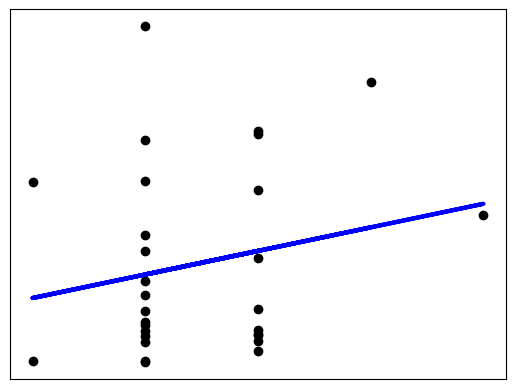

In [38]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, regr.predict(X_train), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [39]:
y_pred = regr.predict(X_test)
y_pred

array([[223.72115108],
       [346.5087554 ],
       [223.72115108],
       [223.72115108],
       [182.79194964],
       [223.72115108],
       [264.65035252]])

In [40]:
y_test

,median_solve_duration_s
32,233.1035
33,335.7600
34,251.5200
35,90.6540
36,197.4125
37,300.2405
38,134.8965


In [41]:
regr.score(X_test, y_test)

0.08568092093296154

In [42]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

57.41297944501541

In [43]:
from joblib import dump
dump(regr, f"models/model-linreg-{response_variable}-{today}.joblib") 

NameError: name 'today' is not defined

## Random forest

In [44]:
response_variable = "median_solve_duration_s"
#response_variable = "failure"

In [45]:
X_train = df_train[feature_names]
y_train = df_train[[response_variable]]

X_test = df_test[feature_names]
y_test = df_test[[response_variable]]

In [46]:
from sklearn.ensemble import RandomForestRegressor
#rf = RandomForestRegressor(n_estimators=1000, max_features="sqrt", max_depth=100)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

/var/folders/jz/_qsj6p5j2gg4s064yzhrbtcw0000gn/T/ipykernel_36703/352781443.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor()

In [47]:
y_pred = rf.predict(X_test)
y_pred

array([172.48483   , 403.0536    , 340.235755  , 226.701925  ,
       282.39577375, 254.10191   , 264.6183725 ])

In [48]:
y_test

,median_solve_duration_s
32,233.1035
33,335.7600
34,251.5200
35,90.6540
36,197.4125
37,300.2405
38,134.8965


In [49]:
rf.score(X_train, y_train)

0.7996133790139834

In [50]:
rf.score(X_test, y_test)

-0.3358387762901154

In [51]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

87.64566946428565

In [52]:
import sklearn.metrics

train_predictions = rf.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = rf.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train R2 score: 0.7996133790139834
Test R2 score: -0.3358387762901154


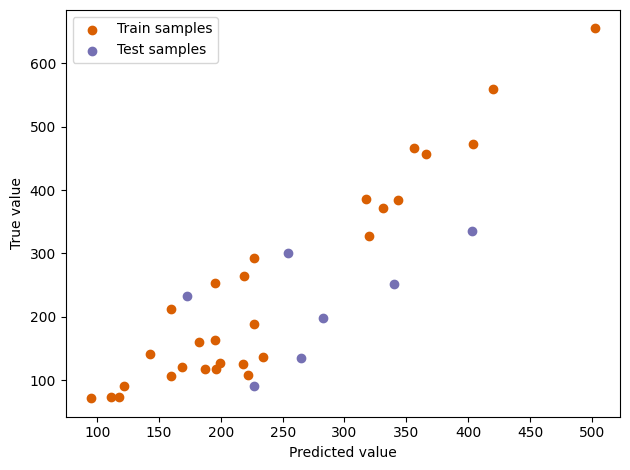

In [53]:
plt.scatter(train_predictions, y_train, label="Train samples", c="#d95f02")
plt.scatter(test_predictions, y_test, label="Test samples", c="#7570b3")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
# plt.plot([0, 500], [0, 500], c="k", zorder=0)
# plt.xlim([30, 500])
# plt.ylim([30, 500])
plt.tight_layout()
plt.show()

In [54]:
importances = rf.feature_importances_
import numpy as np
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

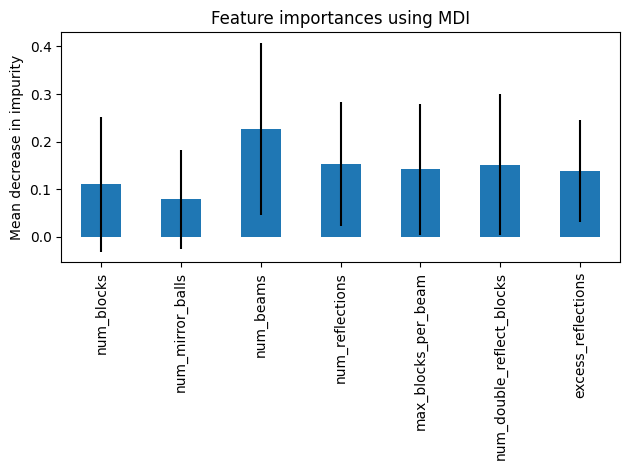

In [55]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Random Forest Classifier

In [41]:
X_train = df_train[feature_names]
y_train = df_train[["difficulty_duration"]]

X_test = df_test[feature_names]
y_test = df_test[["difficulty_duration"]]

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

/var/folders/jz/_qsj6p5j2gg4s064yzhrbtcw0000gn/T/ipykernel_26371/4229390445.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [43]:
rf.score(X_train, y_train)

0.9375

In [44]:
rf.score(X_test, y_test)

0.0

In [45]:
from sklearn.metrics import confusion_matrix
train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)
confusion_matrix(test_predictions, y_test, labels=["easy", "medium", "hard", "superhard"])

array([[0, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 1, 0, 0],
       [0, 0, 0, 0]])

# AutoML

In [71]:
from pprint import pprint

import sklearn.datasets
import sklearn.metrics

import autosklearn.regression
import matplotlib.pyplot as plt

In [72]:
response_variable = "median_solve_duration_s"
#response_variable = "failure"

In [73]:
X_train = df_train[feature_names]
y_train = df_train[[response_variable]]

X_test = df_test[feature_names]
y_test = df_test[[response_variable]]

In [74]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=600
)

In [75]:
automl.fit(X_train, y_train, dataset_name="reflect")

[WARNING] [2023-05-23 14:49:45,724:Client-EnsembleBuilder] No models better than random - using Dummy losses!
	Models besides current dummy model: 0
	Dummy models: 1
[WARNING] [2023-05-23 14:49:46,568:Client-EnsembleBuilder] No models better than random - using Dummy losses!
	Models besides current dummy model: 0
	Dummy models: 1
[WARNING] [2023-05-23 14:49:47,457:Client-EnsembleBuilder] No models better than random - using Dummy losses!
	Models besides current dummy model: 0
	Dummy models: 1
[WARNING] [2023-05-23 14:49:48,276:Client-EnsembleBuilder] No models better than random - using Dummy losses!
	Models besides current dummy model: 0
	Dummy models: 1
[WARNING] [2023-05-23 14:49:49,129:Client-EnsembleBuilder] No models better than random - using Dummy losses!
	Models besides current dummy model: 0
	Dummy models: 1
[WARNING] [2023-05-23 14:49:49,918:Client-EnsembleBuilder] No models better than random - using Dummy losses!
	Models besides current dummy model: 0
	Dummy models: 1
[WAR

AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     per_run_time_limit=60, time_left_for_this_task=600)

In [76]:
print(automl.leaderboard())

          rank  ensemble_weight                 type      cost  duration
model_id                                                                
11           1             0.64    gradient_boosting  0.552479  0.917923
75           2             0.18                  sgd  0.743966  0.662104
131          3             0.14  k_nearest_neighbors  0.860464  0.732735
76           4             0.04                  sgd  0.863478  0.667919


In [77]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train R2 score: 0.8105486377898792
Test R2 score: 0.09422449388174736


In [78]:
y_test

,median_solve_duration_s
32,90.6540
33,197.4125
34,300.2405


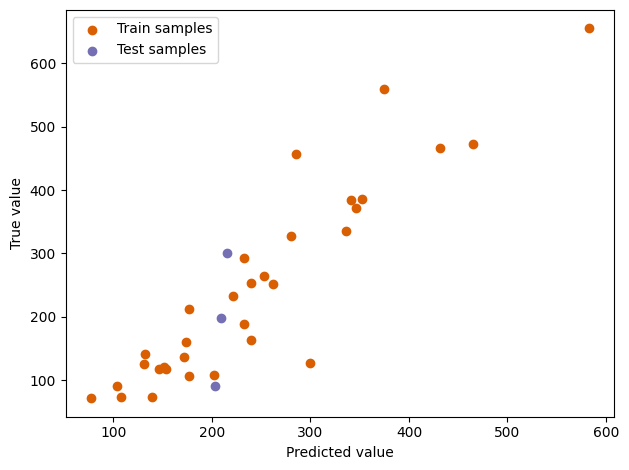

In [79]:
plt.scatter(train_predictions, y_train, label="Train samples", c="#d95f02")
plt.scatter(test_predictions, y_test, label="Test samples", c="#7570b3")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
# plt.plot([0, 400], [0, 400], c="k", zorder=0)
# plt.xlim([30, 400])
# plt.ylim([30, 400])
plt.tight_layout()
plt.show()

In [80]:
from joblib import dump
dump(automl, f"models/model-automl-{response_variable}-{today}.joblib") 

['models/model-automl-median_solve_duration_s-2023-05-23.joblib']